In [1]:
!pip install rakun2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 725.4/725.4 KB 27.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 93.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 85.1 MB/s eta 0:00:00
  Created wheel for rakun2: filename=rakun2-0.25-py3-none-any.whl size=933179 sha256=d84bb6d2aba07f997edbc6bac01bdded9400f5eb2fc6cd4d5b9295bca375324f
  Stored in directory: /root/.cache/pip/wheels/33/6e/94/01a2453fc88240862664d0b959e2e5c215797c606a7d4b610b
Successfully built rakun2
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0


In [1]:
!pip install keybert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 85.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 69.5 MB/s eta 0:00:00
  Created wheel for keybert: filename=keybert-0.7.0-py3-none-any.whl size=23794 sha256=6614722cf88b28235f08c44b55fb6af0bd9547a79a62097bb0ac35a6e145a589
  Stored in directory: /root/.cache/pip/wheels/68/aa/41/82025d89b0eb97484c9ac7d527abf596765c41733af79f86b0
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125942 sha256=f6b8422c6ae6ffe1a220f29e7ef487b26ed16a6fbb6370

In [2]:
!pip install keyphrase_vectorizers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.1/192.1 KB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 61.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 96.6 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.27.4
    Uninstalling transformers-4.27.4:
      Successfully uninstalled transformers-4.27.4


In [3]:
!pip install yake


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 49.7 MB/s eta 0:00:00


In [4]:
import re
import os, os.path
import fnmatch
import json
import collections
import glob
import json

import matplotlib.pyplot as plt
import numpy as np
# import modules for web scrapping
import requests
from bs4 import BeautifulSoup


In [46]:
book = "The Race of My Life_ An Autobiography ( PDFDrive )"
startdate = 1600
enddate = 2023
wikilink = "https://en.wikipedia.org/wiki/Milkha_Singh"
titlename = "Milkha_Singh"

In [47]:
from google.colab import files
from zipfile import ZipFile

# with ZipFile(files.upload(), 'r') as zip:
#   zip.extractall()
#   print('Done')
file_name = rf"/content/{book}.zip"

with ZipFile(file_name, 'r') as zipf:
  zipf.extractall()
  print('Done')

Done


In [48]:
from keyphrase_vectorizers import KeyphraseCountVectorizer
from keybert import KeyBERT
import yake
from rakun2 import RakunKeyphraseDetector


def get_keyword_bert(docs):
    vectorizer = KeyphraseCountVectorizer(pos_pattern= '<N.*>+')
    kw_model = KeyBERT()
    onewords = kw_model.extract_keywords(docs=docs, vectorizer=vectorizer,top_n=5,stop_words='english')
    return onewords

def get_keyword_yake(docs):
    kw_extractor = yake.KeywordExtractor(lan="en", n=3, windowsSize=3,top = 5)
    keywords = kw_extractor.extract_keywords(docs)
    return keywords

def get_keyword_rakun(docs):
  hyperparameters = {"num_keywords": 5,
                   "merge_threshold": 1.1,
                   "alpha": 0.3,
                   "token_prune_len": 3}

  keyword_detector = RakunKeyphraseDetector(hyperparameters)
  out_keywords = keyword_detector.find_keywords(docs, input_type="string")
  return out_keywords



In [49]:
dir_path = rf"/content/{book}/part"
rootdir = rf"/content/{book}/"
part = 1
mp_bert, mp_yake, mp_rakun = {}, {}, {}
for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
    x = 1
    no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
    print(no_of_chapters)
    while x <= no_of_chapters:
        target_x = no_of_chapters+1
        for i in range(x,target_x):
            with open(dir_path + str(part) + '/chapter_'+ str(i) + '.txt', 'r', encoding='utf-8') as content_file:
                key = str(part) + '/chapter_'+ str(i)                
                content = content_file.read()
                print(key)
                mp_bert[key] = get_keyword_bert(content)
                mp_yake[key] = get_keyword_yake(content)
                mp_rakun[key] = get_keyword_rakun(content)
        x = target_x
        part += 1

20
1/chapter_1
1/chapter_2
1/chapter_3
1/chapter_4
1/chapter_5
1/chapter_6
1/chapter_7
1/chapter_8
1/chapter_9
1/chapter_10
1/chapter_11
1/chapter_12
1/chapter_13
1/chapter_14
1/chapter_15
1/chapter_16
1/chapter_17
1/chapter_18
1/chapter_19
1/chapter_20


In [50]:
mp_bert

{'1/chapter_1': [('birth', 0.4311),
  ('chawali kaur', 0.3968),
  ('brother makhan singh', 0.3316),
  ('undivided india', 0.3218),
  ('sampuran singh', 0.3123)],
 '1/chapter_2': [('sikhs', 0.4967),
  ('hindus', 0.4748),
  ('hindus andsikhs', 0.4732),
  ('sikh', 0.4488),
  ('sikh village', 0.4451)],
 '1/chapter_3': [('sutlej river', 0.4276),
  ('imprisonment', 0.3452),
  ('finding shelter', 0.3439),
  ('ferozepur', 0.3431),
  ('plight', 0.3339)],
 '1/chapter_4': [('army life', 0.5559),
  ('fatigue duty', 0.5159),
  ('routine', 0.4209),
  ('regiment', 0.4136),
  ('training period', 0.3976)],
 '1/chapter_5': [('sportsmanship', 0.494),
  ('reason sohan singh', 0.4534),
  ('sohan singh', 0.4231),
  ('southern command sports meet', 0.3764),
  ('metre race', 0.3742)],
 '1/chapter_6': [('wounds', 0.3798),
  ('athletes', 0.3731),
  ('sportspeople', 0.3593),
  ('sports', 0.3591),
  ('athlete', 0.3496)],
 '1/chapter_7': [('fellow indians', 0.4478),
  ('indian olympics team', 0.3974),
  ('smith fa

In [51]:
with open(rf"mp_{book}_bert.json", "w") as outfile:
    json.dump(mp_bert, outfile)

with open(rf"mp_{book}_yake.json", "w") as outfile:
    json.dump(mp_yake, outfile)

with open(rf"mp_{book}_rakun.json", "w") as outfile:
    json.dump(mp_rakun, outfile)

In [52]:
mp_combined = {}
for k in mp_rakun.keys():
  k1 = set([v[0] for v in mp_bert[k]])
  k2 = set([v[0] for v in mp_yake[k]])
  k3 = set([v[0] for v in mp_rakun[k]])
  mp_combined[k] = k1.union(k2,k3)

# mp_combined
for k,v in mp_combined.items():
  print(len(v))

15
15
14
13
14
15
15
14
13
14
15
15
15
15
14
15
15
15
15
15


In [53]:
keyword_to_chap = collections.defaultdict(list)
for key,list_val in mp_combined.items():
    for val in list_val:
        keyword_to_chap[val].append(key)


final_keywords = set()
all_keywords = list(mp_combined.values())
for i in all_keywords:
    for val in i:
            final_keywords.add(val)
print(final_keywords)   
print(len(final_keywords))

{'congratulatory messages', 'difficult to adjust', 'races', 'meeting pandit', 'seharbandi ceremony', 'cricket team', 'makhan singh', 'father', 'village', 'penniless sportspeople', 'hockey football', 'new delhi commonwealth games', 'required infrastructure', 'practice routine', 'metre races', 'education instructor', 'metre relay', 'wounds', 'drugs', 'railway station', 'received gold medals', 'preliminaries', 'relationship', 'chiranjeev milkha singh', 'jewels', 'Kairon Sahib', 'regiment', 'medals', 'physical training', 'berlin olympics', 'spotted animal', 'undivided india', 'Joginder Singh', 'sampuran singh', 'outstanding sportspeople', 'Bishop Cotton', 'fatigue duty', 'sports wings', 'admiration', 'olympics', 'fellow indians', 'achievements and admired', 'panditji', 'commonwealth games today', 'Sikh village', 'police station', 'Milkha Singh', 'Games', 'National Games', 'british empire games', 'sit on mats', 'chawali kaur', 'india athletic', 'Lal Chand', 'Kot Addu', 'forbidding artificia

In [54]:
def get_year_to_content():
    dir_path = rf"/content/{book}/part"
    rootdir =rf"/content/{book}/"
    date_dict = {}
    year_mode_dict = {}
    # for part in range(1,Parts+1):
    part = 1
    for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
        x = 1
        #print("part:" + str(part))
        date_dict[str(part)] = {}
        year_mode_dict[str(part)] = {}
        #print(dir_path + str(part) + '/')
        no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
    #     print('no.of_chapters:' + str(no_of_chapters))
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                #print("chapter:" + str(i))
                with open(dir_path + str(part) + '/chapter_'+ str(i) + '.txt', 'r', encoding='utf-8') as content_file:
                    content = content_file.read()

                regex= "\d{4}"
                dates = re.findall(regex, content)
                mdates = []
                year_list = []
                try:
                    for date in dates:
                        if int(date) <= enddate and int(date) >= startdate:                    
                            #print date
                            year_list.append(date)
                            mdates.append(date)                       
                except:
                    pass
                date_dict[str(part)][str(i)] = mdates
                try:
                    year_mode_dict[str(part)][str(i)] = max(set(year_list), key=year_list.count)
                except:
                    year_mode_dict[str(part)][str(i)] = -1
            x = target_x
            part += 1

    # assigning chapter the date with closest chapter
    def closest(lst, K):
        if lst:
          return lst[min(range(len(lst)), key = lambda i: abs(lst[i]-K))]
        else:
          return -1


    #for part in range(1,Parts+1):
    part = 1
    for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
        x = 1
        # checking which chapters has date assigned
        no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
        chapters_with_date = []
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                # print("chapter:" + str(i))
                if year_mode_dict[str(part)][str(i)] != -1:
                    chapters_with_date.append(i)
            x = target_x
        x = 1
        # assigning date to chapter which is closest to it
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                #print("chapter:" + str(i))
                k = closest(chapters_with_date,i)
                #print("K:",k)
                year_mode_dict[str(part)][str(i)] = year_mode_dict[str(part)][str(k)]
            x = target_x
        part += 1

    year_to_chap = collections.defaultdict(list)  # year -> list of folder paths
    for key in year_mode_dict.keys():
        folder = f"{key}"
        for k2 in year_mode_dict[key].keys():
            file = folder
            file += f"/chapter_{k2}"
            val = year_mode_dict[key][k2]
            year_to_chap[val].append(file)

    return year_to_chap

year_to_chap = get_year_to_content()

keys = []
for k in list(keyword_to_chap.keys()):
    keys.append(k.title().replace(" ", "_"))
keyword_to_chap2 = dict(zip(keys, list(keyword_to_chap.values())))

# year_to_chap
chap_to_year = {}
for k,v in year_to_chap.items():
    for l in v:
        chap_to_year[l]= int(k)
# chap_to_year
keyword_to_year = collections.defaultdict(set)
for k,v in keyword_to_chap.items():
    for l in v:
        keyword_to_year[k.title().replace(" ", "_")].add(chap_to_year[l])
# print(keyword_to_year)

key_yr_chap_mp = collections.defaultdict(list)
for k,v in keyword_to_chap2.items():
    for chap in v:
        key_yr_chap_mp[k+'_'+str(chap_to_year[chap])].append(chap)
print(key_yr_chap_mp)

defaultdict(<class 'list'>, {'Difficult_To_Adjust_1932': ['1/chapter_1'], 'Sit_On_Mats_1932': ['1/chapter_1'], 'Chawali_Kaur_1932': ['1/chapter_1'], 'Brother_Makhan_Singh_1932': ['1/chapter_1'], 'Father_1932': ['1/chapter_1'], 'Neighbouring_Villages_1932': ['1/chapter_1'], 'Completely_Uninterested_1932': ['1/chapter_1'], 'Birth_1932': ['1/chapter_1'], 'Makhan_1932': ['1/chapter_1'], 'Makhan_1947': ['1/chapter_2'], 'Village_School_1932': ['1/chapter_1'], 'Undivided_India_1932': ['1/chapter_1'], 'Run_As_Fast_1932': ['1/chapter_1'], 'Deeply_Disappointed_1932': ['1/chapter_1'], 'Sampuran_Singh_1932': ['1/chapter_1'], 'Evening_1932': ['1/chapter_1'], 'Commanding_Officer_1947': ['1/chapter_2'], 'Sikhs_1947': ['1/chapter_2'], 'Hindus_Andsikhs_1947': ['1/chapter_2'], 'Village_1947': ['1/chapter_2'], 'Village_1950': ['1/chapter_6'], 'Kot_Addu_1947': ['1/chapter_2'], 'Ammunition_And_Instructed_1947': ['1/chapter_2'], 'Village_Gurudwara_1947': ['1/chapter_2'], 'Sikh_Village_1947': ['1/chapter_2']

In [55]:
from sentence_transformers import SentenceTransformer, util
import torch

embedder = SentenceTransformer('all-MiniLM-L6-v2')

def create_representative_doc(corpus,query):
    corpus_embeddings = embedder.encode(corpus, convert_to_tensor=True)
    query_embedding = embedder.encode(query, convert_to_tensor=True)
    
    cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0]
    paragraph = ""
    for i,score in enumerate(cos_scores):
        if score >0.40:
            paragraph += (corpus[i]+'.')

    return paragraph

In [56]:
key_yr_chap_mp

defaultdict(list,
            {'Difficult_To_Adjust_1932': ['1/chapter_1'],
             'Sit_On_Mats_1932': ['1/chapter_1'],
             'Chawali_Kaur_1932': ['1/chapter_1'],
             'Brother_Makhan_Singh_1932': ['1/chapter_1'],
             'Father_1932': ['1/chapter_1'],
             'Neighbouring_Villages_1932': ['1/chapter_1'],
             'Completely_Uninterested_1932': ['1/chapter_1'],
             'Birth_1932': ['1/chapter_1'],
             'Makhan_1932': ['1/chapter_1'],
             'Makhan_1947': ['1/chapter_2'],
             'Village_School_1932': ['1/chapter_1'],
             'Undivided_India_1932': ['1/chapter_1'],
             'Run_As_Fast_1932': ['1/chapter_1'],
             'Deeply_Disappointed_1932': ['1/chapter_1'],
             'Sampuran_Singh_1932': ['1/chapter_1'],
             'Evening_1932': ['1/chapter_1'],
             'Commanding_Officer_1947': ['1/chapter_2'],
             'Sikhs_1947': ['1/chapter_2'],
             'Hindus_Andsikhs_1947': ['1/chapter

In [57]:
def split_sentence_from_text(key):
    file_loc = rf"/content/{book}/part%s.txt"%key
    text = ""
    with open(file_loc,encoding="utf8") as f:
        text = f.read()

    res = re.findall(r"[^.!?]+", text)
    return res

mp_key_doc = {}
for key,val in key_yr_chap_mp.items():
    mp_key_doc[key] = ""
    print(f"{key}")
    for k in val:
        corpus = split_sentence_from_text(k)
#         doc = create_representative_doc(corpus,key)
        mp_key_doc[key] += create_representative_doc(corpus,key)

# print(mp_key_doc)

Difficult_To_Adjust_1932
Sit_On_Mats_1932
Chawali_Kaur_1932
Brother_Makhan_Singh_1932
Father_1932
Neighbouring_Villages_1932
Completely_Uninterested_1932
Birth_1932
Makhan_1932
Makhan_1947
Village_School_1932
Undivided_India_1932
Run_As_Fast_1932
Deeply_Disappointed_1932
Sampuran_Singh_1932
Evening_1932
Commanding_Officer_1947
Sikhs_1947
Hindus_Andsikhs_1947
Village_1947
Village_1950
Kot_Addu_1947
Ammunition_And_Instructed_1947
Village_Gurudwara_1947
Sikh_Village_1947
Subcontinent_1947
Fellow_Jawans_1947
Sikh_1947
Sikh_1960
Police_Station_1947
Hindus_1947
Rigorous_Imprisonment_1949
Ferozepur_1949
Imprisonment_1949
Stand_In_Line_1949
Isher_1949
Isher_1960
Constables_Handcuffed_1949
Days_1956
Railway_Station_1949
Day_1949
Day_1953
Day_1960
Desperation_Bombarding_1949
Family_1949
Plight_1949
Finding_Shelter_1949
Sutlej_River_1949
Fatigue_Duty_1953
Training_Period_1953
Daring_To_Complain_1953
Regiment_1953
Push-Ups_And_Front_1953
Military_Duties_1953
Physical_Training_1953
Routine_1953
Run

In [58]:
with open(rf"mp_key_doc_{book}.json", "w") as outfile:
    json.dump(mp_key_doc, outfile)

In [59]:
url = wikilink
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
response = requests.get(url, headers=headers)
#print(response.status_code)
soup = BeautifulSoup(response.content, 'html.parser')

desired_ids = []
for link in soup.find_all('span', attrs={'class':'mw-headline'}):
    if link.get('id') is not None: 
        desired_ids.append(link.get('id'))
print(desired_ids)

def FetchParagraphBetweenIds(id1,id2):
    hElem = soup.find("span", {'id': id1})
    endElem = soup.find('span', {'id': id2})
    cntns = list(soup.find_all())

    my_lst = []
    inBetween = False
    for tag in cntns:
        if tag == hElem:
            inBetween = True
        if inBetween == True and tag.name == 'p':
            my_lst.append(tag.get_text())
        if tag == endElem:
            inBetween = False
            break
    return "".join(my_lst)

id_to_paragraph = {}
for i in range(len(desired_ids)-1):
    id_to_paragraph[desired_ids[i]] = FetchParagraphBetweenIds(desired_ids[i],desired_ids[i+1])

['Early_life', 'International_career', 'Later_life', 'Media_and_popular_culture', 'Personal_life', 'Records_and_honours', 'Awards', 'Honours', 'Bibliography', 'Notes', 'References', 'External_links']


In [60]:
from sentence_transformers import SentenceTransformer, util
import torch

mp_sim_score = {}
embedder = SentenceTransformer('all-MiniLM-L6-v2')

for key1, val1 in id_to_paragraph.items():
    for key2,val2 in mp_key_doc.items():
        if val1 != '' and val2 != '':
            corpus_embeddings = embedder.encode(val1, convert_to_tensor=True)
            query_embedding = embedder.encode(val2, convert_to_tensor=True)
            cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0][0]
            mp_sim_score[str(key1)+'->'+str(key2)] = cos_scores
            # print(f"{key1} {key2} {cos_scores}")

In [61]:
mp_sim_score

{'Early_life->Chawali_Kaur_1932': tensor(0.4011, device='cuda:0'),
 'Early_life->Brother_Makhan_Singh_1932': tensor(0.5576, device='cuda:0'),
 'Early_life->Father_1932': tensor(0.1512, device='cuda:0'),
 'Early_life->Completely_Uninterested_1932': tensor(0.0287, device='cuda:0'),
 'Early_life->Birth_1932': tensor(0.1277, device='cuda:0'),
 'Early_life->Makhan_1932': tensor(0.5031, device='cuda:0'),
 'Early_life->Makhan_1947': tensor(0.4807, device='cuda:0'),
 'Early_life->Village_School_1932': tensor(0.0459, device='cuda:0'),
 'Early_life->Undivided_India_1932': tensor(0.3036, device='cuda:0'),
 'Early_life->Sampuran_Singh_1932': tensor(0.4204, device='cuda:0'),
 'Early_life->Commanding_Officer_1947': tensor(0.1662, device='cuda:0'),
 'Early_life->Sikhs_1947': tensor(0.5278, device='cuda:0'),
 'Early_life->Hindus_Andsikhs_1947': tensor(0.5259, device='cuda:0'),
 'Early_life->Village_1950': tensor(0.1480, device='cuda:0'),
 'Early_life->Village_Gurudwara_1947': tensor(0.3342, device='cu

In [62]:
mp_sim_score = {k: v.item() for k, v in mp_sim_score.items()}

with open(rf"mp_sim_score_{book}.json", "w") as outfile:
    json.dump(mp_sim_score, outfile)

In [63]:
import json
with open(f"mp_sim_score_{book}.json") as outfile:
    mp_sim_score = json.load(outfile)

In [64]:
def display_bar_plot(dict_t,title,xlab,ylab):
    plt.figure(figsize=(10,7))
    plt.bar(*zip(*dict_t.items()))
    plt.title(title)
    # plt.grid()
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.show()

In [65]:
mp_sim_score_bar_range = {}
a,b,c,d,e = 0,0,0,0,0
for k,v in mp_sim_score.items():
    if v<0:
        a += 1
    elif v>=0 and v<0.25:
        b+= 1
    elif v>=0.25 and v<0.5:
        c += 1
    elif v>=0.5 and v<0.75:
        d += 1
    elif v>= 0.75:
        e += 1
mp_sim_score_bar_range["<0"] = a
mp_sim_score_bar_range["0-0.25"] = b
mp_sim_score_bar_range["0.25-0.5"] = c
mp_sim_score_bar_range["0.5-0.75"] = d
mp_sim_score_bar_range["0.75-1"] = e


# display_bar_plot(mp_sim_score_bar_range,rf"similarity distribution for {book}","similarity","count")

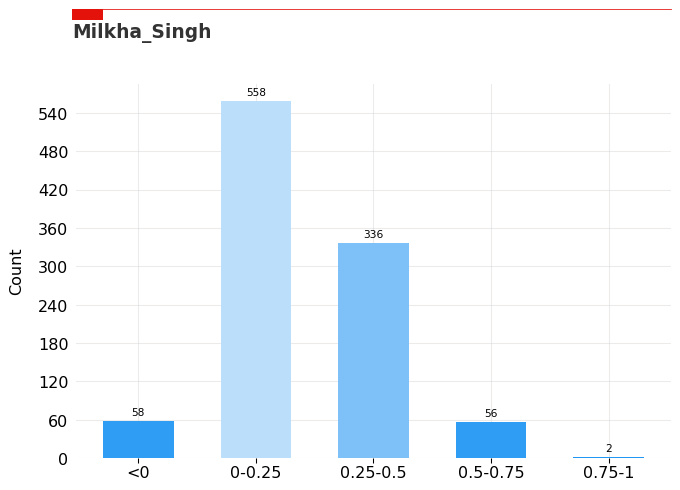

In [66]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator

# Create the figure and axes objects, specify the size and the dots per inches
# delay_by_month['Month'], delay_by_month['ArrDelay'] ->  
# list(mp_sim_score_bar_range.keys()), list(mp_sim_score_bar_range.values())

fig, ax = plt.subplots(figsize=(8,6), dpi = 96)

# Plot bars
bar1 = ax.bar(list(mp_sim_score_bar_range.keys()), list(mp_sim_score_bar_range.values()),width=0.6)
# Create the grid 
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

# Reformat x-axis label and tick labels
ax.set_xlabel('', fontsize=12, labelpad=10) # No need for an axis label
ax.xaxis.set_label_position("bottom")
ax.xaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=12, labelrotation=0)
labels = list(mp_sim_score_bar_range.keys())
ax.set_xticks(list(mp_sim_score_bar_range.keys()), labels) # Map integers numbers from the series to labels list

# Reformat y-axis
ax.set_ylabel('Count', fontsize=12, labelpad=10)
ax.yaxis.set_label_position("left")
ax.yaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_tick_params(pad=2, labeltop=False, labelbottom=True, bottom=False, labelsize=12)

# Add label on top of each bar
ax.bar_label(bar1, labels=[f'{e:,.0f}' for e in list(mp_sim_score_bar_range.values())], padding=3, color='black', fontsize=8) 

# Remove the spines
ax.spines[['top','left','right','bottom']].set_visible(False)

# Make the left spine thicker
ax.spines['right'].set_linewidth(1.1)

# Add in red line and rectangle on top
ax.plot([0.12, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#E3120B', linewidth=.6)
ax.add_patch(plt.Rectangle((0.12,.98), 0.04, -0.02, facecolor='#E3120B', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add in title and subtitle
ax.text(x=0.12, y=.93, s=titlename, transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
# ax.text(x=0.12, y=.90, s="between Wikipedia section content and Keyword focused paragraph", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

# Set source text
# ax.text(x=0.1, y=0.12, s="Mahatma Gandhi", transform=fig.transFigure, ha='left', fontsize=10, alpha=.7)

# Adjust the margins around the plot area
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.85, wspace=None, hspace=None)

# Set a white background
fig.patch.set_facecolor('white')

# Colours - Choose the extreme colours of the colour map
colours = ["#2196f3", "#bbdefb"]

# Colormap - Build the colour maps
cmap = mpl.colors.LinearSegmentedColormap.from_list("colour_map", colours, N=256)
norm = mpl.colors.Normalize(min(list(mp_sim_score_bar_range.values())), max(list(mp_sim_score_bar_range.values()))) # linearly normalizes data into the [0.0, 1.0] interval

# Plot bars
bar1 = ax.bar(list(mp_sim_score_bar_range.keys()), list(mp_sim_score_bar_range.values()), color=cmap(norm(list(mp_sim_score_bar_range.values()))), width=0.6, zorder=2)
fig.savefig(f"similarity_distribution_{book}.png")

In [67]:
from statistics import median
def fetch_single_date_from_content(content):
    regex= "\d{4}"
    dates = re.findall(regex, content)
    year_list = []
    res = -1
    try:
        for date in dates:
            if int(date) <= enddate and int(date) >= startdate:                    
                #print date
                year_list.append(int(date))
    except:
        pass
    if year_list:
        # res = max(set(year_list), key=year_list.count)
        res = median(year_list)
    return int(res)
    
wiki_section_date = {}
for k,v in id_to_paragraph.items():
#     print(fetch_dates_from_content(v))
    wiki_section_date[k] = fetch_single_date_from_content(v)
print(wiki_section_date)

{'Early_life': 1947, 'International_career': 1960, 'Later_life': 2006, 'Media_and_popular_culture': 2013, 'Personal_life': 1980, 'Records_and_honours': -1, 'Awards': -1, 'Honours': -1, 'Bibliography': -1, 'Notes': -1, 'References': -1}


In [68]:
# keeping a threshold
mp_sim_score_50 = {}
for key,val in mp_sim_score.items():
    if val >= 0.30:
        mp_sim_score_50[key] = val

        
# section wise hyperlink
section_wise_keyword = collections.defaultdict(set)
for k,v in mp_sim_score_50.items():
    section_name, keyword = k.split('->')[0],k.split('->')[1]
    section_wise_keyword[section_name].add(keyword.title().replace(" ", "_"))
    
# section_wise_keyword
mixed_sim_score = {}
date_diff = 0
for k,v in section_wise_keyword.items():
    for elem in v:
        key = k+'->'+elem
        d_k = int(elem[elem.rindex('_')+1:])
        d_w = wiki_section_date[k]
#         print(f"{d_k}    {d_w}")
        if d_w == -1: date_diff = enddate-startdate
        else: date_diff = abs(d_k-d_w)+1
        date_score = 1/date_diff
        sim_score = mp_sim_score_50[key]
        rank = 0.5*date_score + 0.5*sim_score
        mixed_sim_score[key] = rank

## Keyword Filteration 1

In [69]:
section_wise_keyword_filtered = collections.defaultdict(list)
for k,v in mixed_sim_score.items():
    section_name, keyword = k.split('->')[0],k.split('->')[1]
    section_wise_keyword_filtered[section_name].append((keyword.title().replace(" ", "_"),v))

final_kw = set()

for k,v in section_wise_keyword_filtered.items():
  for ele in v:
    final_kw.add(ele[0])
# print(final_kw)
print(len(final_kw))

# initialization
kw_max_score = {}
for k in final_kw:
  kw_max_score[k] = 0

for k,v in section_wise_keyword_filtered.items():
  for ele in v:
    kw_max_score[ele[0]] = max(kw_max_score[ele[0]], ele[1])
# print(kw_max_score)


120


In [70]:
for k,v in section_wise_keyword_filtered.items():
  print(f"{k}   ->  {len(v)}")

Early_life   ->  46
International_career   ->  84
Later_life   ->  61
Media_and_popular_culture   ->  45
Personal_life   ->  43


In [71]:
mp_final_kw = collections.defaultdict(list)
for k,v in section_wise_keyword_filtered.items():
  mp = {}
  for ele in v:
    mp[ele[0]] = ele[1]
  for ele in v:
    if mp[ele[0]] == kw_max_score[ele[0]]:
      mp_final_kw[k].append(ele)

# mp1 = {}
# for k,v in mp_final_kw.items():
#   mp1[k] = len(v)
#   # print(f"{k}   ->  {len(v)}")

# print(mp1)

In [72]:
# section_wise_keyword_filtered
section_wise_keyword_sort =  collections.defaultdict(list)
for k ,v in mp_final_kw.items():
    if len(v)>=5:
        section_wise_keyword_sort[k] = sorted(v,key = lambda x:x[1],reverse = True)[:5]
    else:
        section_wise_keyword_sort[k] = sorted(v,key = lambda x:x[1],reverse = True)
        
section_wise_keyword_sort_only = collections.defaultdict(list)
for k,v in section_wise_keyword_sort.items():
    section_wise_keyword_sort_only[k] = [ele[0] for ele in v]
    
for k,v in section_wise_keyword_sort_only.items():
    print(f"{k}  ->   {v}")
mp1 = {}
for k,v in section_wise_keyword_sort_only.items():
  mp1[k] = len(v)
  # print(f"{k}   ->  {len(v)}")

print(mp1)

Early_life  ->   ['Sikhs_1947', 'Hindus_Andsikhs_1947', 'Sikh_1947', 'Makhan_1947', 'Hindus_1947']
International_career  ->   ['Race_1960', 'Sprinters_1960', 'Olympics_1960', 'Metre_Race_1960', 'Pak_Sports_Meet_1960']
Later_life  ->   ['Olympics_2012', 'Sports_Authorities_2012', 'International_Events_2012', 'Sardar_Pratap_Singh_Kairon_1962', 'Kairon_Sahib_1962']
Media_and_popular_culture  ->   ['Released_In_Punjabi_2012', 'Outstanding_Sportspeople_2012', 'Delhi_Commonwealth_Games_2012', 'New_Delhi_Commonwealth_Games_2012', 'Indian_Olympic_Association_2012']
Personal_life  ->   ['Singh_1982', 'Athlete_1982', 'Jeev_1985', 'Singh_1965', 'Makhan_Singh_1965']
{'Early_life': 5, 'International_career': 5, 'Later_life': 5, 'Media_and_popular_culture': 5, 'Personal_life': 5}


In [73]:
# top_mp_final_kw = collections.defaultdict(list)
# for k,v in mp_final_kw.items():
#   for ele in v:
#     if ele[1]>0.50:
#       print(ele)
#       top_mp_final_kw[k].append(ele)

# mp1 = {}
# for k,v in top_mp_final_kw.items():
#   mp1[k] = len(v)

# print(mp1)

In [74]:
# for k,v in section_wise_keyword_filtered.items():
#   mp = {}
#   for ele in v:
#     mp[ele[0]] = ele[1]

#   for ele in v:
#     if mp[ele[0]]  != kw_max_score[ele[0]]:
#       section_wise_keyword_filtered[k].remove(ele)

# for k,v in section_wise_keyword_filtered.items():
#   print(f"{k}   ->  {len(v)}")

In [75]:
with open(rf"filtered_kw_{book}.json", "w") as outfile:
    json.dump(mp_final_kw, outfile)

In [76]:
def kw_2_nrml(s1):
  temp = s1[:s1.rindex('_')]
  a = temp.split('_')
  # for i,v in enumerate(a):
  #     a[i] = v.lower()
      
  val = " ".join(a)
  return val
  
def find_freq(key,txt):
    reg = f"(?i){key}"
    return len(re.findall(rf"(?i){key}", txt))

temp = []
multitimekws = []
for k in final_kw:
  temp.append(kw_2_nrml(k))

mp = collections.Counter(temp)
for k,v in mp.items():
  if v>1:
    multitimekws.append(k)

print(multitimekws)
print(len(multitimekws))

section_to_num = {}  # this dict will store num of keywords which are present in keywords as a simple text
for k,v in section_wise_keyword_sort.items():
  cnt = set()
  for ele in v:
    temp = kw_2_nrml(ele[0])
    if find_freq(temp,id_to_paragraph[k])>0: #and temp not in multitimekws:
      cnt.add(temp)
  section_to_num[k] = cnt

mp2 = {}
for k,v in section_to_num.items():
  mp2[k] = len(v)

print(mp2)

['Singh', 'Nimmi', 'Metre Race', 'Race', 'Olympics', 'Kairon Sahib', 'International Events', 'Makhan', 'Khaliq', 'Athletes', 'India', 'Athlete', 'Commonwealth Games', 'Sikh']
14
{'Early_life': 3, 'International_career': 2, 'Later_life': 0, 'Media_and_popular_culture': 0, 'Personal_life': 2}


In [77]:
print(sum(list(mp2.values())))

7


In [78]:
def FetchURLSBetweenIds(id1,id2):
    hElem = soup.find("span", {'id': id1})
    endElem = soup.find('span', {'id': id2})
    cntns = list(soup.find_all())
    linkToScrape = []
    inBetween = False
    for tag in cntns:
        if tag == hElem:
            inBetween = True
        if inBetween == True and tag.name == 'p':
#             my_lst.append(tag.get_text())
            allLinks = tag.find_all('a')
            
            for link in allLinks:
                if link.get('href') is not None and link.get('href').find("/wiki/")== 0: 
                    linkToScrape.append(link['href'].replace('/wiki/',""))
        if tag == endElem:
            inBetween = False
            break
    return set(linkToScrape)

mp_urls_section_mp  = {}
for i in range(len(desired_ids)-1):
    mp_urls_section_mp[desired_ids[i]] = FetchURLSBetweenIds(desired_ids[i],desired_ids[i+1])

# print(mp_urls_section_mp)

sec_2_common_link = {}
for k,v in section_wise_keyword_sort.items():
  couldbelinks = set()
  for ele in v:
    s1 = ele[0]
    couldbelinks.add(s1[:s1.rindex('_')])
  sec_2_common_link[k] = mp_urls_section_mp[k].intersection(couldbelinks)

print(sec_2_common_link)
# print(sum(list(sec_2_common_link.values())))
mp3 = {}
for k,v in sec_2_common_link.items():
  mp3[k] = len(v)

print(mp3)
print(sum(list(mp3.values())))

{'Early_life': set(), 'International_career': set(), 'Later_life': set(), 'Media_and_popular_culture': set(), 'Personal_life': set()}
{'Early_life': 0, 'International_career': 0, 'Later_life': 0, 'Media_and_popular_culture': 0, 'Personal_life': 0}
0


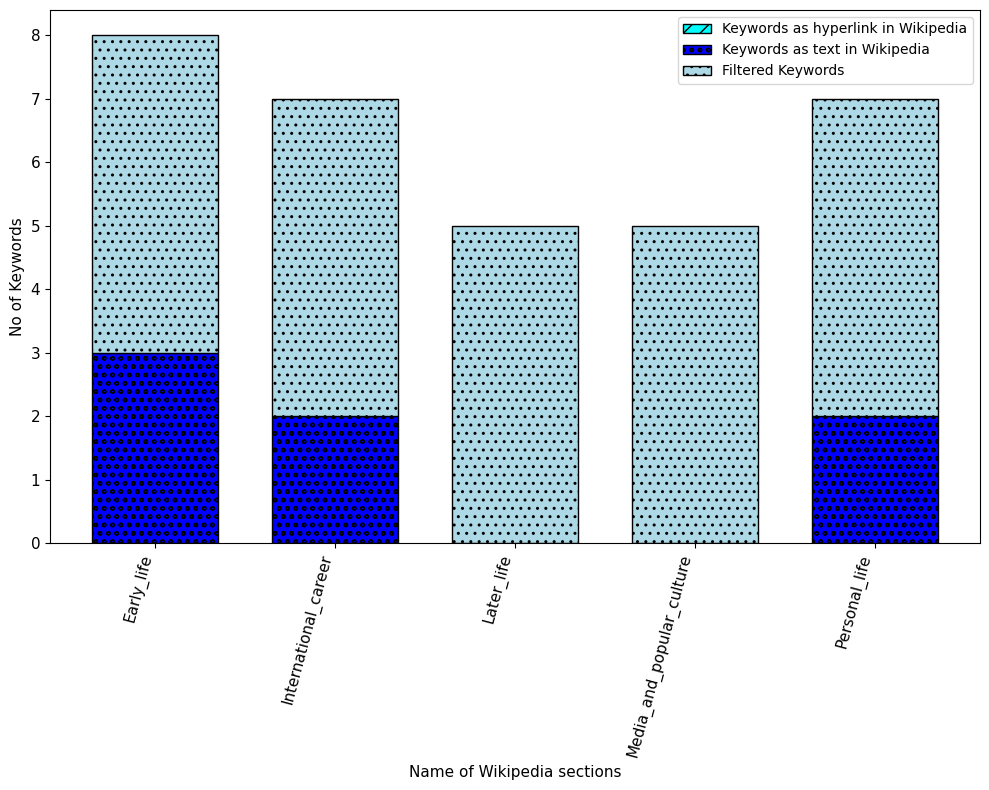

In [79]:
#Plot has been done for the tag has greater than 1 value
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (10, 8))

x = list(mp3.keys())
y1 = list(mp3.values())
y2 = list(mp2.values())
y3 = list(mp1.values())

plt.bar(x, y1, width=0.7, color ='#00FFFF', hatch= "//", edgecolor = "black")
plt.bar(x, y2, bottom=y1, width=0.7, color ='blue', hatch= "oo", edgecolor = "black")
plt.bar(x, y3, bottom=y2, width=0.7, color ='lightblue', hatch= "..", edgecolor = "black")

plt.xlabel("Name of Wikipedia sections", fontsize=11, y= -0.1)
#plt.ylabel("Ratio of the duplicate question\n to the all question associated\n with the particular tag", fontsize=14)
plt.ylabel("No of Keywords", fontsize=11)
#plt.title("Students enrolled in different courses")
plt.xticks(rotation=75, fontsize=11, ha="right")
plt.yticks(fontsize=11)
plt.legend(["Keywords as hyperlink in Wikipedia", "Keywords as text in Wikipedia", "Filtered Keywords"])

#plt.show()
plt.tight_layout()
plt.savefig(f"kw_dist_wiki_sec_{book}.png")

# Wikipedia Page Creation
I am targeting the keywords which are present in wikipedia as a text but no hyperlinks are present and timed keywords that are present in different wikipedia section but in different year

In [80]:
final_keywords = set()
for k,v in section_wise_keyword_sort_only.items():
    for s1 in v:
        final_keywords.add(s1[:s1.rindex('_')])
# key_yr_chap_mp
print(final_keywords)

{'Olympics', 'Athlete', 'Hindus', 'Outstanding_Sportspeople', 'Delhi_Commonwealth_Games', 'Pak_Sports_Meet', 'Released_In_Punjabi', 'Race', 'Indian_Olympic_Association', 'Hindus_Andsikhs', 'Sardar_Pratap_Singh_Kairon', 'Metre_Race', 'New_Delhi_Commonwealth_Games', 'Makhan', 'Sprinters', 'Sikh', 'Sikhs', 'Singh', 'Sports_Authorities', 'Jeev', 'Makhan_Singh', 'International_Events', 'Kairon_Sahib'}


In [81]:
allLinks = soup.find(id="bodyContent").find_all("a")
linkToScrape = []
for link in allLinks:
    if link.get('href') is not None and link.get('href').find("/wiki/")== 0: 
        linkToScrape.append(link)

print(len(linkToScrape))
# print the urls of linkToScrape
# https://en.wikipedia.org/wiki/Nationalism#Anti-colonial_nationalism
# url = "https://en.wikipedia.org"
urls = set()
for link in linkToScrape:
    urls.add(link['href'].replace('/wiki/',""))
print(urls)
     

482
{'Bill_Roberts_(athlete)', 'Vasudevan_Baskaran', 'Gurdial_Singh_(mountaineer)', 'Hamdan_Al-Bishi', 'P._V._Sindhu', 'Rachel_Thomas_(skydiver)', 'Ramaswamy_Gnanasekaran', 'Bert_Cameron', 'Category:Recipients_of_the_Padma_Shri_in_sports', 'Rajyavardhan_Singh_Rathore', 'National_Games_of_India', 'International_Olympic_Committee', 'Arunima_Sinha', 'Kanji_Akagi', '1958_Asian_Games', 'Mukesh_Kumar_(field_hockey)', 'Sania_Mirza', 'Jhulan_Goswami', 'Sankara_Narayana_Menon_Chundayil', 'Verghese_Kurien', 'Murlikant_Petkar', 'Ghaus_Mohammad', 'Government_of_Punjab,_India', 'Guru_Hanuman', 'Ramesh_Krishnan', 'Sachin_Tendulkar', 'Krishna_Poonia', 'Wilson_Jones_(billiards_player)', 'Muzala_Samukonga', 'Lavy_Pinto', 'All-weather_running_track', 'Gurcharan_Singh_(cricketer)', 'Karnam_Malleswari', 'Prashanti_Singh', 'Sakshi_Malik', 'Premlata_Agrawal', 'Swaroop_Kishen', 'Asian_Games', 'Template:Footer_Asian_Games_Champions_400_metres_Men', 'The_Race_of_My_Life', 'Narendra_Kumar_(mountaineer)', 'Pneum

In [82]:
hyperlinks_present = final_keywords & set(urls)
print(hyperlinks_present)
len(hyperlinks_present)

set()


0

In [83]:
final_keywords = set()
for k,v in section_wise_keyword_sort_only.items():
    for s1 in v:
        final_keywords.add(s1)
#         final_keywords.add(s1[:s1.rindex('_')])
# key_yr_chap_mp
print(final_keywords)

{'Pak_Sports_Meet_1960', 'Sardar_Pratap_Singh_Kairon_1962', 'Singh_1965', 'Hindus_1947', 'Olympics_2012', 'Makhan_Singh_1965', 'Singh_1982', 'Sikhs_1947', 'Hindus_Andsikhs_1947', 'Sports_Authorities_2012', 'Race_1960', 'Sikh_1947', 'Olympics_1960', 'Metre_Race_1960', 'Outstanding_Sportspeople_2012', 'Delhi_Commonwealth_Games_2012', 'Sprinters_1960', 'International_Events_2012', 'Athlete_1982', 'Indian_Olympic_Association_2012', 'Jeev_1985', 'New_Delhi_Commonwealth_Games_2012', 'Kairon_Sahib_1962', 'Makhan_1947', 'Released_In_Punjabi_2012'}


In [84]:
keyword_to_chap_final = {}
for k,v in key_yr_chap_mp.items():
    if k in final_keywords:
        keyword_to_chap_final[k] = v
print(keyword_to_chap_final)

{'Makhan_1947': ['1/chapter_2'], 'Sikhs_1947': ['1/chapter_2'], 'Hindus_Andsikhs_1947': ['1/chapter_2'], 'Sikh_1947': ['1/chapter_2'], 'Hindus_1947': ['1/chapter_2'], 'Metre_Race_1960': ['1/chapter_13'], 'Race_1960': ['1/chapter_11', '1/chapter_12', '1/chapter_13'], 'Singh_1965': ['1/chapter_17'], 'Singh_1982': ['1/chapter_19'], 'Athlete_1982': ['1/chapter_19'], 'Olympics_1960': ['1/chapter_11', '1/chapter_13'], 'Olympics_2012': ['1/chapter_20'], 'Pak_Sports_Meet_1960': ['1/chapter_11'], 'Sprinters_1960': ['1/chapter_13'], 'Kairon_Sahib_1962': ['1/chapter_14'], 'Sardar_Pratap_Singh_Kairon_1962': ['1/chapter_14'], 'Makhan_Singh_1965': ['1/chapter_17'], 'Jeev_1985': ['1/chapter_18'], 'International_Events_2012': ['1/chapter_20'], 'New_Delhi_Commonwealth_Games_2012': ['1/chapter_20'], 'Delhi_Commonwealth_Games_2012': ['1/chapter_20'], 'Sports_Authorities_2012': ['1/chapter_20'], 'Outstanding_Sportspeople_2012': ['1/chapter_20'], 'Released_In_Punjabi_2012': ['1/chapter_20'], 'Indian_Olympi

In [85]:
final_keyword_freq = list()
for s1 in final_keywords:
    temp = s1[:s1.rindex('_')]
    a = temp.split('_')
    for i,v in enumerate(a):
        a[i] = v.lower()
        
    final_keyword_freq.append(" ".join(a))
print(final_keyword_freq)

['pak sports meet', 'sardar pratap singh kairon', 'singh', 'hindus', 'olympics', 'makhan singh', 'singh', 'sikhs', 'hindus andsikhs', 'sports authorities', 'race', 'sikh', 'olympics', 'metre race', 'outstanding sportspeople', 'delhi commonwealth games', 'sprinters', 'international events', 'athlete', 'indian olympic association', 'jeev', 'new delhi commonwealth games', 'kairon sahib', 'makhan', 'released in punjabi']


In [86]:
import re
para = ""
for k,v in id_to_paragraph.items():
    para += v


final_keyword_freq_mp = {}
for k in final_keyword_freq:
    final_keyword_freq_mp[k] = find_freq(k,para)

total = len(final_keyword_freq)
cnt = 0
for k,v in final_keyword_freq_mp.items():
    if v>0:
        cnt += 1
        
print(cnt)
print(total)
print(cnt/total)

9
25
0.36
